In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,matthews_corrcoef,precision_recall_curve,confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

from xgboost import XGBClassifier,plot_importance,plot_tree

In [2]:
df = pd.read_csv("dataset/MSCAD.csv")

In [3]:
df.head()

,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max',...,'Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min',Label
0,1518,2,5,110,377,110,0,55.0,77.7817,377,...,1,0,0,0,0,0,0,0,0,Brute_Force
1,5894,4,8,168,4498,168,0,42.0,84.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
2,272,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force
3,2611,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
4,294,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force


In [4]:
df.shape

(128799, 67)

In [5]:
#Nom des colonnes

print("Noms des colonnes :\n",list(df.columns))

Noms des colonnes :
 ["'Flow Duration'", "'Tot Fwd Pkts'", "'Tot Bwd Pkts'", "'TotLen Fwd Pkts'", "'TotLen Bwd Pkts'", "'Fwd Pkt Len Max'", "'Fwd Pkt Len Min'", "'Fwd Pkt Len Mean'", "'Fwd Pkt Len Std'", "'Bwd Pkt Len Max'", "'Bwd Pkt Len Min'", "'Bwd Pkt Len Mean'", "'Bwd Pkt Len Std'", "'Flow Byts/s'", "'Flow Pkts/s'", "'Flow IAT Mean'", "'Flow IAT Std'", "'Flow IAT Max'", "'Flow IAT Min'", "'Fwd IAT Tot'", "'Fwd IAT Mean'", "'Fwd IAT Std'", "'Fwd IAT Max'", "'Fwd IAT Min'", "'Bwd IAT Tot'", "'Bwd IAT Mean'", "'Bwd IAT Std'", "'Bwd IAT Max'", "'Bwd IAT Min'", "'Bwd PSH Flags'", "'Bwd URG Flags'", "'Fwd Header Len'", "'Bwd Header Len'", "'Fwd Pkts/s'", "'Bwd Pkts/s'", "'Pkt Len Min'", "'Pkt Len Max'", "'Pkt Len Mean'", "'Pkt Len Std'", "'Pkt Len Var'", "'FIN Flag Cnt'", "'SYN Flag Cnt'", "'RST Flag Cnt'", "'PSH Flag Cnt'", "'ACK Flag Cnt'", "'URG Flag Cnt'", "'CWE Flag Count'", "'ECE Flag Cnt'", "'Down/Up Ratio'", "'Pkt Size Avg'", "'Fwd Seg Size Avg'", "'Bwd Seg Size Avg'", "'Subflow

In [6]:
print(df.Label.unique())

['Brute_Force' 'HTTP_DDoS' 'ICMP_Flood' 'Normal' 'Port_Scan' 'Web_Crwling']


In [7]:
#How many entries are there in malicious traffic? In benign traffic?

print("Benign traffic : ", len(df[df.Label=='Normal']))
print("Malicious traffic : ", len(df[df.Label!='Normal']))

Benign traffic :  28502
Malicious traffic :  100297


In [8]:
df["Label"].value_counts()

Brute_Force    88502
Normal         28502
Port_Scan      11081
HTTP_DDoS        641
ICMP_Flood        45
Web_Crwling       28
Name: Label, dtype: int64

In [9]:
print(list(df.select_dtypes(include=['O'])))

['Label']


In [10]:
X = df.copy()
Y = df["Label"]
Y.to_frame()
X = X.drop(columns = ['Label'])
col = list(df.select_dtypes(include=['O']))
col = col[:-1]
enc = OneHotEncoder(handle_unknown='ignore')
transformed = pd.DataFrame(enc.fit_transform(X[col]).toarray())
X = X.join(transformed)
X = X.drop(col,axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.3, shuffle = True)

The precision, the recall, and the accuracy can be found in the following classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61912
           1       1.00      0.95      0.97       459
           2       0.95      0.69      0.80        29
           3       1.00      1.00      1.00     19985
           4       1.00      0.99      1.00      7757
           5       0.30      0.17      0.21        18

    accuracy                           1.00     90160
   macro avg       0.87      0.80      0.83     90160
weighted avg       1.00      1.00      1.00     90160

The balanced accuracy : 0.7994940123188155
The Matthews Correlation Coefficient : 0.9970844318616422


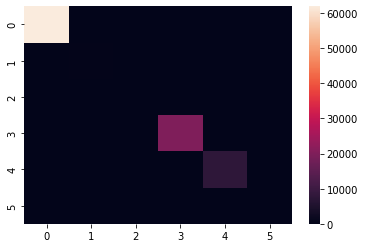

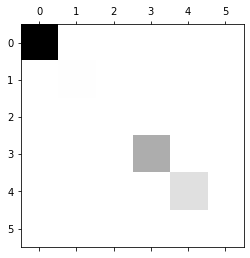

In [37]:
le = preprocessing.LabelEncoder()
y_train_transformed = le.fit_transform(y_train)

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train_transformed)

y_predictions_transformed = model_xgb.predict(X_test)

y_test_t = le.transform(y_test)
conf_matrix = confusion_matrix(y_test_t, y_predictions_transformed)
sn.heatmap(conf_matrix)
plt.matshow(conf_matrix,cmap=plt.cm.gray_r)

print("The precision, the recall, and the accuracy can be found in the following classification report :")
print(classification_report(y_test_t, y_predictions_transformed))

print("The balanced accuracy : " + str(balanced_accuracy_score(y_test_t, y_predictions_transformed)))
print("The Matthews Correlation Coefficient : " + str(matthews_corrcoef(y_test_t,y_predictions_transformed)))

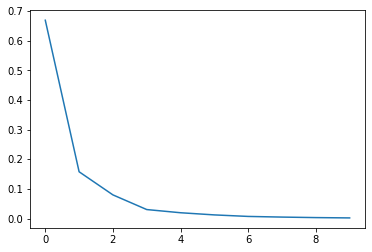

In [18]:
pca = PCA(n_components=10)
pca.fit(X)

plt.plot(range(0,10),pca.explained_variance_ratio_)

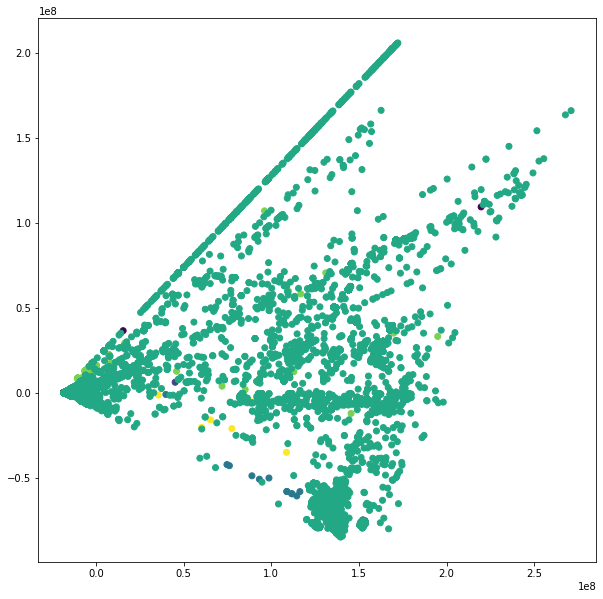

In [19]:
pca = PCA(n_components=2)
pca.fit(X)
coeff=pca.components_

Xt=pca.transform(X)

plt.figure(figsize=(10,10))
plt.scatter(Xt[:,0],Xt[:,1],c=le.fit_transform(Y))

The precision, the recall, and the accuracy can be found in the following classification report :
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     61912
           1       0.00      0.00      0.00       459
           2       0.00      0.00      0.00        29
           3       1.00      0.12      0.21     19985
           4       0.00      0.00      0.00      7757
           5       0.00      0.00      0.00        18

    accuracy                           0.71     90160
   macro avg       0.30      0.19      0.18     90160
weighted avg       0.75      0.71      0.65     90160



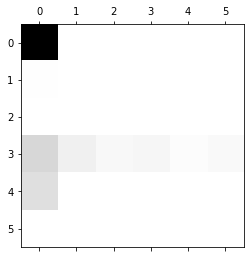

In [36]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=6)
kmeans = model_kmeans.fit(X_train,y_train_transformed)
y_kmeans_predictions = model_kmeans.predict(X_test)

conf_matrix = confusion_matrix(y_test_t, y_kmeans_predictions)
plt.matshow(conf_matrix,cmap=plt.cm.gray_r)

print("The precision, the recall, and the accuracy can be found in the following classification report :")
print(classification_report(y_test_t, y_kmeans_predictions))